In [20]:
# Бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Загрузка
url = './DATA/Car_Insurance_Claim.csv'
df = pd.read_csv(url, index_col=0)

In [22]:
# ID  нам точно не потрібно
df = df.iloc[:,1:]
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [23]:
df = df.replace('none', np.nan)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  9900 non-null   object
 1   GENDER               9901 non-null   object
 2   RACE                 9901 non-null   object
 3   DRIVING_EXPERIENCE   9900 non-null   object
 4   EDUCATION            8004 non-null   object
 5   INCOME               10000 non-null  object
 6   CREDIT_SCORE         8928 non-null   object
 7   VEHICLE_OWNERSHIP    9900 non-null   object
 8   VEHICLE_YEAR         9900 non-null   object
 9   MARRIED              9902 non-null   object
 10  CHILDREN             9900 non-null   object
 11  POSTAL_CODE          9900 non-null   object
 12  ANNUAL_MILEAGE       8950 non-null   object
 13  VEHICLE_TYPE         9901 non-null   object
 14  SPEEDING_VIOLATIONS  9901 non-null   object
 15  DUIS                 9900 non-null   object
 16  PAST_ACCID

In [25]:
label_mapping = {'upper class': 4, 'poverty': 0, 'working class': 1, 'middle class': 3}
df['INCOME_Categorical'] = df['INCOME'].replace(label_mapping)
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,INCOME_Categorical
0,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,4
1,16-25,male,majority,0-9y,NaN,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,0
2,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,1
3,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0,0,0,0.0,1
4,26-39,male,majority,10-19y,NaN,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0,4
9996,26-39,female,majority,10-19y,NaN,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0,3
9997,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0,3
9998,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0,0


In [28]:
df['CREDIT_SCORE'] = pd.to_numeric(df['CREDIT_SCORE'], errors='coerce')

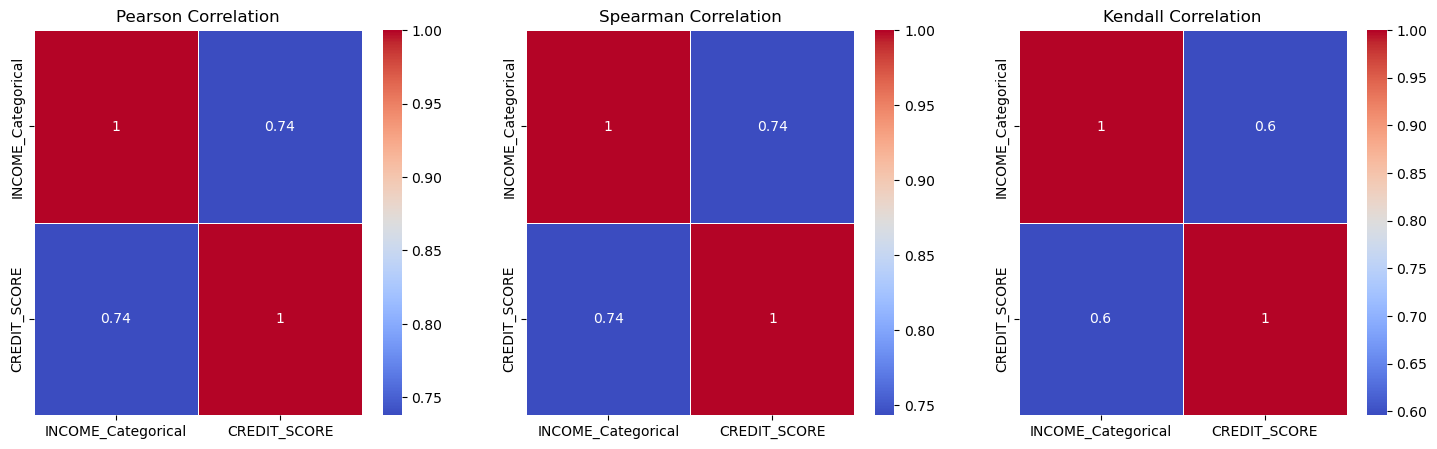

In [29]:
# Create subplots for the heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Calculate and plot the Pearson correlation heatmap
correlation_matrix = df[['INCOME_Categorical', 'CREDIT_SCORE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title("Pearson Correlation")

# Calculate and plot the Spearman correlation heatmap
correlation_matrix = df[['INCOME_Categorical', 'CREDIT_SCORE']].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title("Spearman Correlation")

# Calculate and plot the Kendall correlation heatmap
correlation_matrix = df[['INCOME_Categorical', 'CREDIT_SCORE']].corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[2])
axes[2].set_title("Kendall Correlation")

plt.show()

#### Кореляція гарна помірна монотонна

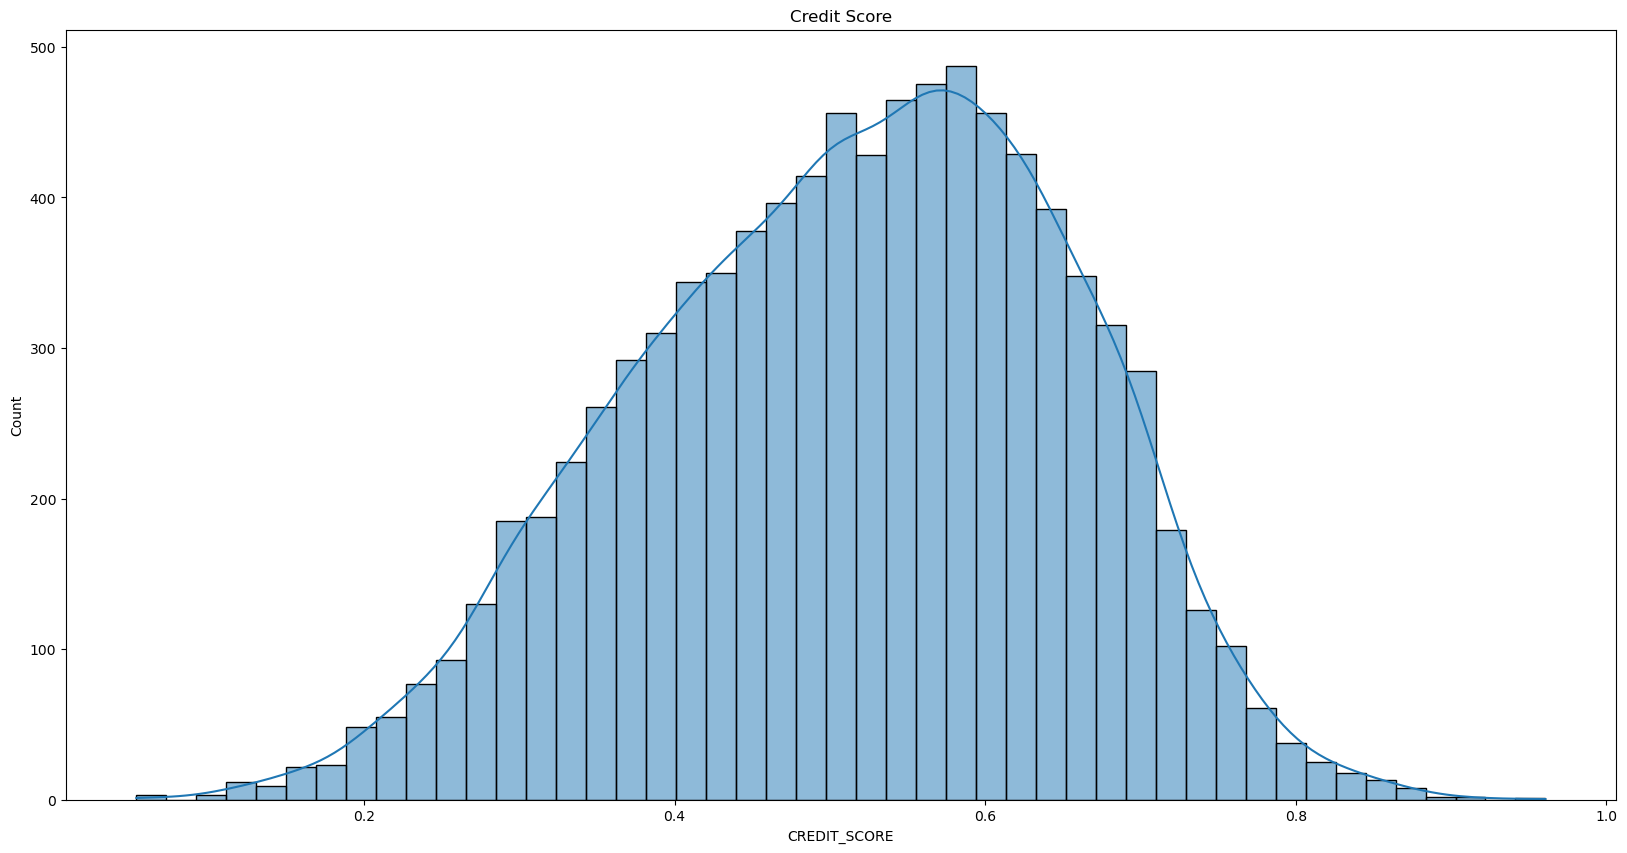

In [30]:
plt.figure(figsize=(20,10))
plt.title('Credit Score')
sns.histplot(data=df, x='CREDIT_SCORE', kde=True)
plt.show()

/tmp/ipykernel_6013/2418763452.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.histplot(data=df, x='CREDIT_SCORE', hue='INCOME_Categorical', kde=True, common_norm=False, palette=dark_palette)


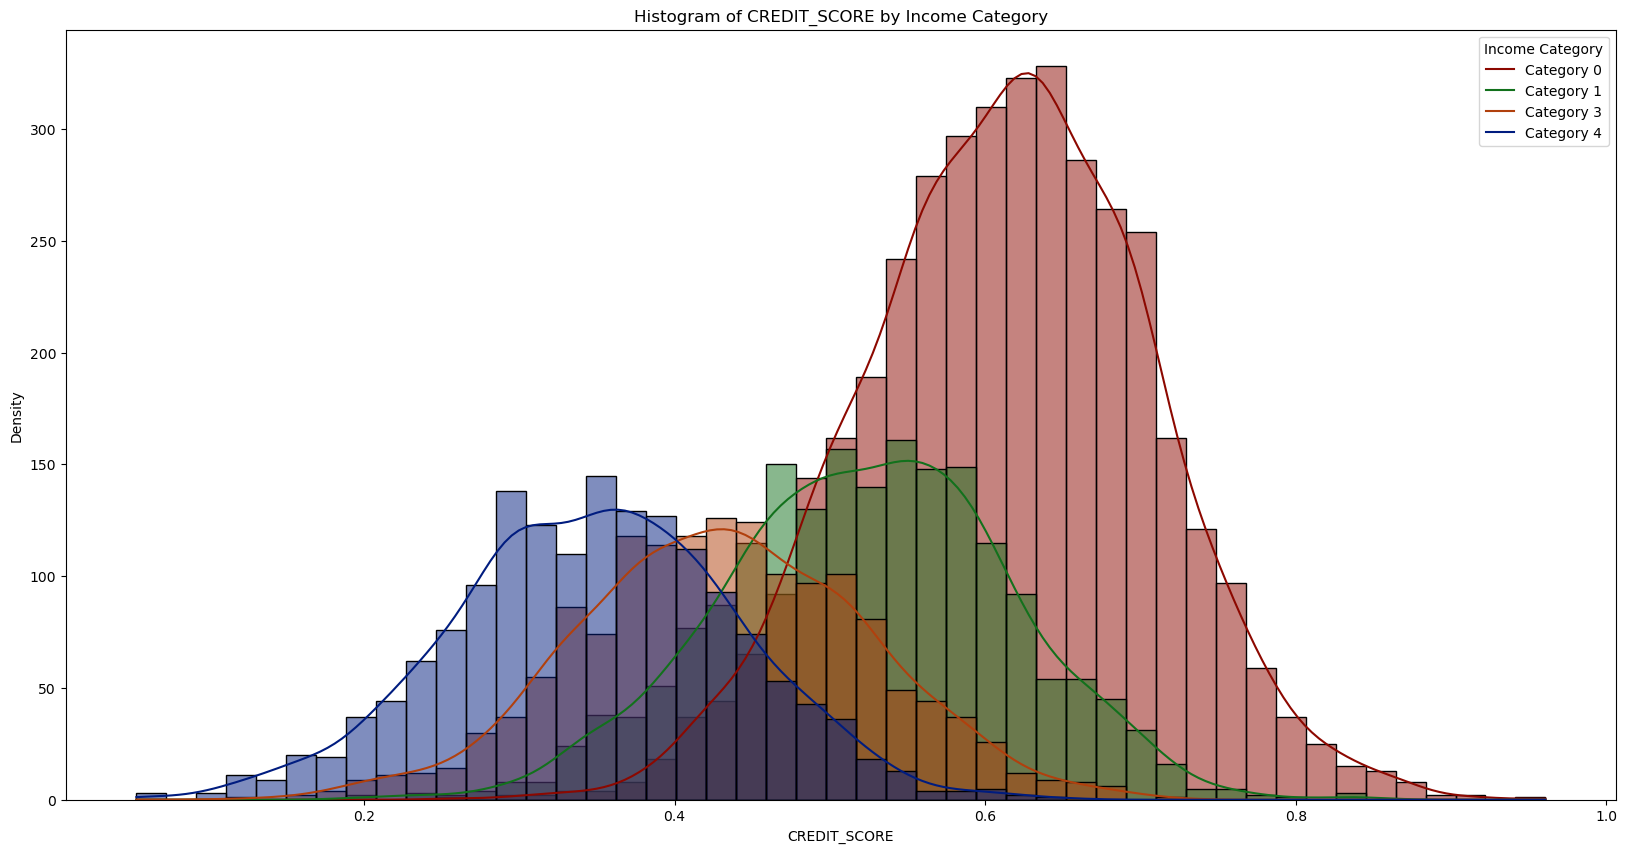

In [31]:
dark_palette = sns.color_palette("dark")
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='CREDIT_SCORE', hue='INCOME_Categorical', kde=True, common_norm=False, palette=dark_palette)
plt.xlabel('CREDIT_SCORE')
plt.ylabel('Density')
plt.title('Histogram of CREDIT_SCORE by Income Category')
plt.legend(title='Income Category', labels=['Category 0', 'Category 1', 'Category 3', 'Category 4'])
plt.show()

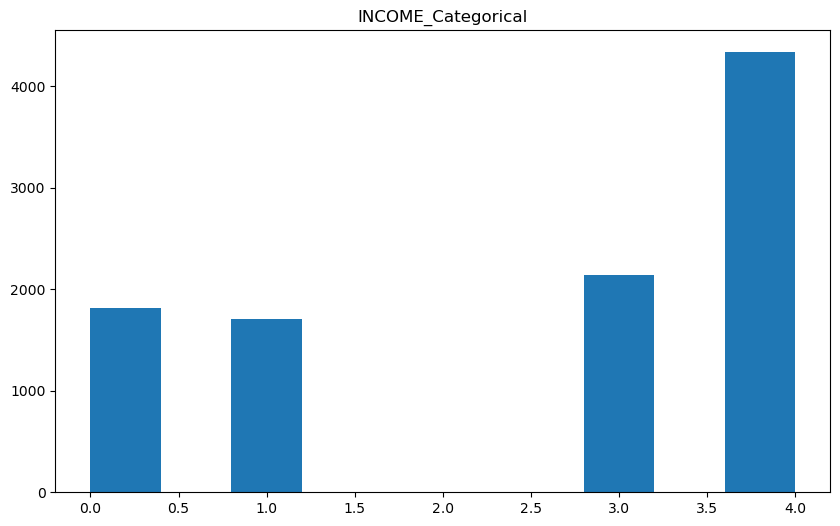

In [32]:
plt.figure(figsize=(10,6))
plt.title('INCOME_Categorical')
plt.hist(data=df, x='INCOME_Categorical')
plt.show()

Ну можемо використати міжквартальну медіану¶

In [33]:
df.groupby('INCOME_Categorical')['CREDIT_SCORE'].median()

INCOME_Categorical
0    0.350168
1    0.431242
3    0.526681
4    0.616289
Name: CREDIT_SCORE, dtype: float64

In [34]:
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df.groupby('INCOME_Categorical')['CREDIT_SCORE'].transform('median'))
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,INCOME_Categorical
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,4
1,16-25,male,majority,0-9y,NaN,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,1
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0,0,0,0.0,1
4,26-39,male,majority,10-19y,NaN,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0,4
9996,26-39,female,majority,10-19y,NaN,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0,3
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0,3
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0,0


In [35]:
df.isna().sum()

AGE                     100
GENDER                   99
RACE                     99
DRIVING_EXPERIENCE      100
EDUCATION              1996
INCOME                    0
CREDIT_SCORE              0
VEHICLE_OWNERSHIP       100
VEHICLE_YEAR            100
MARRIED                  98
CHILDREN                100
POSTAL_CODE             100
ANNUAL_MILEAGE         1050
VEHICLE_TYPE             99
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
INCOME_Categorical        0
dtype: int64

In [36]:
df['ANNUAL_MILEAGE'] = pd.to_numeric(df['ANNUAL_MILEAGE'], errors='coerce')

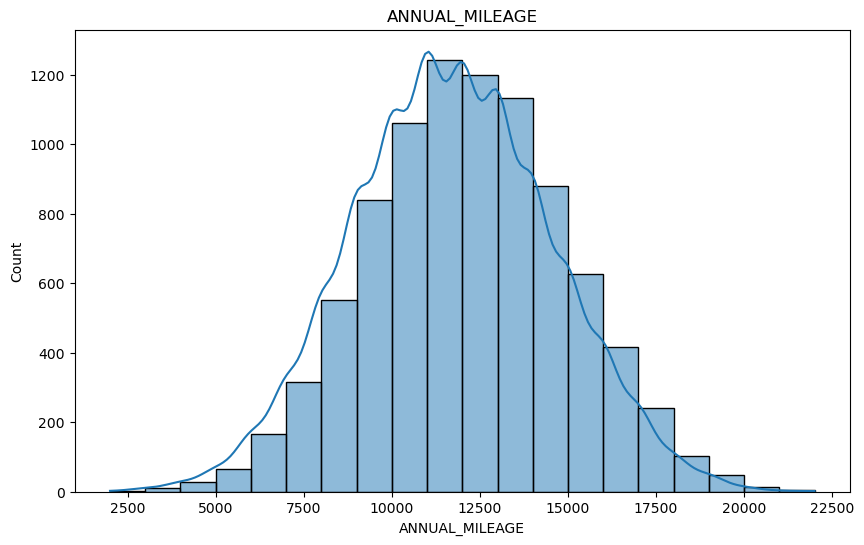

In [37]:
plt.figure(figsize=(10,6))
plt.title('ANNUAL_MILEAGE')
sns.histplot(data=df, x='ANNUAL_MILEAGE', bins=20, kde=True)
plt.show()

Ну можна далі аналізувати но хай буде медіана

In [38]:
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [39]:
df.isna().sum()

AGE                     100
GENDER                   99
RACE                     99
DRIVING_EXPERIENCE      100
EDUCATION              1996
INCOME                    0
CREDIT_SCORE              0
VEHICLE_OWNERSHIP       100
VEHICLE_YEAR            100
MARRIED                  98
CHILDREN                100
POSTAL_CODE             100
ANNUAL_MILEAGE            0
VEHICLE_TYPE             99
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
INCOME_Categorical        0
dtype: int64

In [40]:
df['OUTCOME'] = pd.to_numeric(df['OUTCOME'], errors='coerce')

In [41]:
df.isna().sum()

AGE                     100
GENDER                   99
RACE                     99
DRIVING_EXPERIENCE      100
EDUCATION              1996
INCOME                    0
CREDIT_SCORE              0
VEHICLE_OWNERSHIP       100
VEHICLE_YEAR            100
MARRIED                  98
CHILDREN                100
POSTAL_CODE             100
ANNUAL_MILEAGE            0
VEHICLE_TYPE             99
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
INCOME_Categorical        0
dtype: int64

In [42]:
df.dropna(subset=['OUTCOME'], inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9900 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9801 non-null   object 
 1   GENDER               9801 non-null   object 
 2   RACE                 9804 non-null   object 
 3   DRIVING_EXPERIENCE   9801 non-null   object 
 4   EDUCATION            7928 non-null   object 
 5   INCOME               9900 non-null   object 
 6   CREDIT_SCORE         9900 non-null   float64
 7   VEHICLE_OWNERSHIP    9801 non-null   object 
 8   VEHICLE_YEAR         9801 non-null   object 
 9   MARRIED              9803 non-null   object 
 10  CHILDREN             9802 non-null   object 
 11  POSTAL_CODE          9801 non-null   object 
 12  ANNUAL_MILEAGE       9900 non-null   float64
 13  VEHICLE_TYPE         9803 non-null   object 
 14  SPEEDING_VIOLATIONS  9801 non-null   object 
 15  DUIS                 9801 non-null   object

In [44]:
df.isna().sum()

AGE                      99
GENDER                   99
RACE                     96
DRIVING_EXPERIENCE       99
EDUCATION              1972
INCOME                    0
CREDIT_SCORE              0
VEHICLE_OWNERSHIP        99
VEHICLE_YEAR             99
MARRIED                  97
CHILDREN                 98
POSTAL_CODE              99
ANNUAL_MILEAGE            0
VEHICLE_TYPE             97
SPEEDING_VIOLATIONS      99
DUIS                     99
PAST_ACCIDENTS          100
OUTCOME                   0
INCOME_Categorical        0
dtype: int64

In [45]:
# Загальна сумма пропушених данних
df.isna().sum().sum()

3252

In [46]:
# Унікальна сумма пропушених данних
df.isna().any(axis=1).sum()

2941

In [48]:
print('Відсоток пропущених данних {:.3f}'.format(2941/9900 * 100))

Відсоток пропущених данних 29.707


In [49]:
df['EDUCATION'].unique()

array(['high school', nan, 'university'], dtype=object)

In [51]:
df1 = df.copy()

In [53]:
df1['AGE'].unique()

array(['65+', '16-25', '26-39', '40-64', nan], dtype=object)

In [55]:
label_mapping = {'65+': 4, '16-25': 0, '26-39': 1, '40-64': 3}
df1['AGE'] = df1['AGE'].replace(label_mapping)
df1

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,INCOME_Categorical
0,4.0,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,4
1,0.0,male,majority,0-9y,NaN,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,0
2,0.0,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,1
3,0.0,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0,0,0,0.0,1
4,1.0,male,majority,10-19y,NaN,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0,4
9996,1.0,female,majority,10-19y,NaN,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,12000.0,sedan,1,0,0,0.0,3
9997,1.0,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0,3
9998,1.0,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0,0


In [56]:
df1['GENDER'].unique()

array(['female', 'male', nan], dtype=object)

In [90]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_categories = label_encoder.fit_transform(df1['GENDER'])
for category, encoded_category in zip(categories, encoded_categories):
    print(f'Категорія: {category}, Код: {encoded_category}')
df1['GENDER'] = encoded_categories

Категорія: female, Код: 0
Категорія: male, Код: 1
Категорія: nan, Код: 0


In [91]:
encoded_categories

array([0, 1, 0, ..., 1, 0, 0])

In [92]:
df1['GENDER'].unique()

array([0, 1, 2])

In [93]:
df1['GENDER'] = df1['GENDER'].replace(2, np.nan)

In [94]:
df1['GENDER'].unique()

array([ 0.,  1., nan])

In [106]:
df2 = df1[['AGE', 'GENDER', 'EDUCATION', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'INCOME_Categorical']]

In [110]:
df2[['AGE', 'GENDER', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'INCOME_Categorical']].corr()

,AGE,GENDER,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical
AGE,1.000000,0.004968,0.505077,-0.260443,0.638692
GENDER,0.004968,1.000000,-0.074356,-0.015010,0.025772
CREDIT_SCORE,0.505077,-0.074356,1.000000,-0.172813,0.757708
ANNUAL_MILEAGE,-0.260443,-0.015010,-0.172813,1.000000,-0.246555
INCOME_Categorical,0.638692,0.025772,0.757708,-0.246555,1.000000


In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9900 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 9801 non-null   float64
 1   GENDER              9801 non-null   float64
 2   EDUCATION           7928 non-null   object 
 3   CREDIT_SCORE        9900 non-null   float64
 4   ANNUAL_MILEAGE      9900 non-null   float64
 5   INCOME_Categorical  9900 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 541.4+ KB


In [114]:
df2['EDUCATION']

0       high school
1               NaN
2       high school
3        university
4               NaN
           ...     
9995     university
9996            NaN
9997    high school
9998    high school
9999            NaN
Name: EDUCATION, Length: 9900, dtype: object

In [117]:
ind_ed = df2[df2['EDUCATION'].isna()].index
ind_ed

Index([   1,    4,    9,   17,   22,   23,   27,   32,   33,   37,
       ...
       9960, 9963, 9968, 9971, 9973, 9976, 9977, 9982, 9996, 9999],
      dtype='int64', length=1972)

In [121]:
df3 = df2[df2['EDUCATION'].notna()]
df3

,AGE,GENDER,EDUCATION,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical
0,4.0,0.0,high school,0.629027,12000.0,4
2,0.0,0.0,high school,0.493146,11000.0,1
3,0.0,1.0,university,0.206013,11000.0,1
5,3.0,0.0,high school,0.619127,13000.0,4
6,4.0,1.0,high school,0.492944,13000.0,4
...,...,...,...,...,...,...
9993,1.0,1.0,university,0.695466,11000.0,4
9994,1.0,1.0,high school,0.454300,16000.0,3
9995,1.0,0.0,university,0.582787,16000.0,4
9997,1.0,1.0,high school,0.470940,14000.0,3


In [124]:
df3.dropna(inplace=True)

/tmp/ipykernel_6013/1665326329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [127]:
df3

,AGE,GENDER,EDUCATION,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical
0,4.0,0.0,high school,0.629027,12000.0,4
2,0.0,0.0,high school,0.493146,11000.0,1
3,0.0,1.0,university,0.206013,11000.0,1
5,3.0,0.0,high school,0.619127,13000.0,4
6,4.0,1.0,high school,0.492944,13000.0,4
...,...,...,...,...,...,...
9993,1.0,1.0,university,0.695466,11000.0,4
9994,1.0,1.0,high school,0.454300,16000.0,3
9995,1.0,0.0,university,0.582787,16000.0,4
9997,1.0,1.0,high school,0.470940,14000.0,3


In [129]:
label_mapping1 = {'high school': 0, 'university': 1}
df3['EDUCATION'] = df1['EDUCATION'].replace(label_mapping1)
df3

/tmp/ipykernel_6013/843881278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['EDUCATION'] = df1['EDUCATION'].replace(label_mapping1)


,AGE,GENDER,EDUCATION,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical
0,4.0,0.0,0.0,0.629027,12000.0,4
2,0.0,0.0,0.0,0.493146,11000.0,1
3,0.0,1.0,1.0,0.206013,11000.0,1
5,3.0,0.0,0.0,0.619127,13000.0,4
6,4.0,1.0,0.0,0.492944,13000.0,4
...,...,...,...,...,...,...
9993,1.0,1.0,1.0,0.695466,11000.0,4
9994,1.0,1.0,0.0,0.454300,16000.0,3
9995,1.0,0.0,1.0,0.582787,16000.0,4
9997,1.0,1.0,0.0,0.470940,14000.0,3


In [134]:
df3[['AGE', 'GENDER', 'EDUCATION', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'INCOME_Categorical']].corr()['EDUCATION'].sort_values(ascending=False)

EDUCATION             1.000000
INCOME_Categorical    0.375246
CREDIT_SCORE          0.262073
AGE                   0.170252
GENDER                0.091656
ANNUAL_MILEAGE       -0.082757
Name: EDUCATION, dtype: float64

In [157]:
X = df3[['INCOME_Categorical', 'CREDIT_SCORE', 'AGE']]
y = df3['EDUCATION']
y.value_counts()

EDUCATION
0.0    4000
1.0    3768
Name: count, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [145]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='auc')

[0]	validation_0-auc:0.75176	validation_1-auc:0.69478
[1]	validation_0-auc:0.75546	validation_1-auc:0.69515
[2]	validation_0-auc:0.76224	validation_1-auc:0.69729
[3]	validation_0-auc:0.76602	validation_1-auc:0.69915
[4]	validation_0-auc:0.76600	validation_1-auc:0.69935
[5]	validation_0-auc:0.76896	validation_1-auc:0.69874
[6]	validation_0-auc:0.77153	validation_1-auc:0.69781
[7]	validation_0-auc:0.77265	validation_1-auc:0.69793
[8]	validation_0-auc:0.77491	validation_1-auc:0.70074
[9]	validation_0-auc:0.77592	validation_1-auc:0.70065
[10]	validation_0-auc:0.77687	validation_1-auc:0.70112
[11]	validation_0-auc:0.77983	validation_1-auc:0.70079
[12]	validation_0-auc:0.78012	validation_1-auc:0.70081
[13]	validation_0-auc:0.78049	validation_1-auc:0.70055
[14]	validation_0-auc:0.78325	validation_1-auc:0.70129
[15]	validation_0-auc:0.78342	validation_1-auc:0.70137


/home/sv/anaconda3/envs/Camp/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/sv/anaconda3/envs/Camp/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.78604	validation_1-auc:0.70127
[17]	validation_0-auc:0.78775	validation_1-auc:0.70124
[18]	validation_0-auc:0.79060	validation_1-auc:0.70098
[19]	validation_0-auc:0.79117	validation_1-auc:0.70085
[20]	validation_0-auc:0.79455	validation_1-auc:0.70032


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [150]:
df4 = df2.loc[ind_ed]
df4 = df4[['INCOME_Categorical', 'CREDIT_SCORE', 'AGE']]
df4

,INCOME_Categorical,CREDIT_SCORE,AGE
1,0,0.357757,0.0
4,1,0.388366,1.0
9,4,0.561531,3.0
17,0,0.350168,0.0
22,0,0.330950,3.0
...,...,...,...
9976,0,0.430527,1.0
9977,4,0.710640,4.0
9982,3,0.493119,1.0
9996,3,0.522231,1.0


In [151]:
model.predict(df4)

array([0, 0, 1, ..., 1, 0, 0])

In [158]:
df2.loc[ind_ed, 'EDUCATION'] = model.predict(df4)
df2['EDUCATION'] = df2['EDUCATION'].apply(lambda x: 0 if x == 'high school' else 1)
df2

/tmp/ipykernel_6013/2271532399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EDUCATION'] = df2['EDUCATION'].apply(lambda x: 0 if x == 'high school' else 1)


,AGE,GENDER,EDUCATION,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical
0,4.0,0.0,0,0.629027,12000.0,4
1,0.0,1.0,1,0.357757,16000.0,0
2,0.0,0.0,0,0.493146,11000.0,1
3,0.0,1.0,1,0.206013,11000.0,1
4,1.0,1.0,1,0.388366,12000.0,1
...,...,...,...,...,...,...
9995,1.0,0.0,1,0.582787,16000.0,4
9996,1.0,0.0,1,0.522231,12000.0,3
9997,1.0,1.0,0,0.470940,14000.0,3
9998,1.0,0.0,0,0.364185,13000.0,0


In [162]:
df2

,AGE,GENDER,EDUCATION,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical
0,4.0,0.0,0,0.629027,12000.0,4
1,0.0,1.0,1,0.357757,16000.0,0
2,0.0,0.0,0,0.493146,11000.0,1
3,0.0,1.0,1,0.206013,11000.0,1
4,1.0,1.0,1,0.388366,12000.0,1
...,...,...,...,...,...,...
9995,1.0,0.0,1,0.582787,16000.0,4
9996,1.0,0.0,1,0.522231,12000.0,3
9997,1.0,1.0,0,0.470940,14000.0,3
9998,1.0,0.0,0,0.364185,13000.0,0


In [172]:
df_res = pd.concat([df2, df[['RACE', 
                    'DRIVING_EXPERIENCE', 
                    'VEHICLE_OWNERSHIP', 
                    'VEHICLE_YEAR', 
                    'MARRIED', 
                    'CHILDREN', 
                    'POSTAL_CODE', 
                    'VEHICLE_TYPE', 
                    'SPEEDING_VIOLATIONS', 
                    'DUIS', 
                    'PAST_ACCIDENTS', 
                    'OUTCOME']]], axis=1)
df_res

,AGE,GENDER,EDUCATION,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical,RACE,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,4.0,0.0,0,0.629027,12000.0,4,majority,0-9y,1.0,after 2015,0.0,1.0,10238,sedan,0,0,0,0.0
1,0.0,1.0,1,0.357757,16000.0,0,majority,0-9y,0.0,before 2015,0.0,0.0,10238,sedan,0,0,0,1.0
2,0.0,0.0,0,0.493146,11000.0,1,majority,0-9y,1.0,before 2015,0.0,0.0,10238,sedan,0,0,0,0.0
3,0.0,1.0,1,0.206013,11000.0,1,majority,0-9y,1.0,before 2015,0.0,NaN,32765,sedan,0,0,0,0.0
4,1.0,1.0,1,0.388366,12000.0,1,majority,10-19y,1.0,before 2015,0.0,0.0,32765.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,1,0.582787,16000.0,4,majority,10-19y,1.0,before 2015,0.0,0.0,10238,sedan,0,0,1,0.0
9996,1.0,0.0,1,0.522231,12000.0,3,majority,10-19y,1.0,after 2015,0.0,1.0,32765,sedan,1,0,0,0.0
9997,1.0,1.0,0,0.470940,14000.0,3,majority,0-9y,1.0,before 2015,0.0,1.0,10238,sedan,0,0,0,0.0
9998,1.0,0.0,0,0.364185,13000.0,0,majority,10-19y,0.0,before 2015,0.0,1.0,10238,sedan,2,0,1,1.0


In [181]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9900 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9801 non-null   float64
 1   GENDER               9801 non-null   float64
 2   EDUCATION            9900 non-null   int64  
 3   CREDIT_SCORE         9900 non-null   float64
 4   ANNUAL_MILEAGE       9900 non-null   float64
 5   INCOME_Categorical   9900 non-null   int64  
 6   RACE                 9804 non-null   object 
 7   DRIVING_EXPERIENCE   9801 non-null   object 
 8   VEHICLE_OWNERSHIP    9801 non-null   object 
 9   VEHICLE_YEAR         9801 non-null   object 
 10  MARRIED              9803 non-null   object 
 11  CHILDREN             9802 non-null   object 
 12  POSTAL_CODE          9801 non-null   object 
 13  VEHICLE_TYPE         9803 non-null   object 
 14  SPEEDING_VIOLATIONS  9801 non-null   object 
 15  DUIS                 9801 non-null   object

In [184]:
df_res.isna().sum()

AGE                     99
GENDER                  99
EDUCATION                0
CREDIT_SCORE             0
ANNUAL_MILEAGE           0
INCOME_Categorical       0
RACE                    96
DRIVING_EXPERIENCE      99
VEHICLE_OWNERSHIP       99
VEHICLE_YEAR            99
MARRIED                 97
CHILDREN                98
POSTAL_CODE             99
VEHICLE_TYPE            97
SPEEDING_VIOLATIONS     99
DUIS                    99
PAST_ACCIDENTS         100
OUTCOME                  0
dtype: int64

In [185]:
df_res.isna().sum().sum()

1280

In [186]:
# Унікальна сумма пропушених данних
df_res.isna().any(axis=1).sum()

1199

In [190]:
df_res.dropna(inplace=True)

In [191]:
df_res

,AGE,GENDER,EDUCATION,CREDIT_SCORE,ANNUAL_MILEAGE,INCOME_Categorical,RACE,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,4.0,0.0,0,0.629027,12000.0,4,majority,0-9y,1.0,after 2015,0.0,1.0,10238,sedan,0,0,0,0.0
1,0.0,1.0,1,0.357757,16000.0,0,majority,0-9y,0.0,before 2015,0.0,0.0,10238,sedan,0,0,0,1.0
2,0.0,0.0,0,0.493146,11000.0,1,majority,0-9y,1.0,before 2015,0.0,0.0,10238,sedan,0,0,0,0.0
4,1.0,1.0,1,0.388366,12000.0,1,majority,10-19y,1.0,before 2015,0.0,0.0,32765.0,sedan,2,0,1,1.0
5,3.0,0.0,0,0.619127,13000.0,4,majority,20-29y,1.0,after 2015,0.0,1.0,10238,sedan,3,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,1,0.582787,16000.0,4,majority,10-19y,1.0,before 2015,0.0,0.0,10238,sedan,0,0,1,0.0
9996,1.0,0.0,1,0.522231,12000.0,3,majority,10-19y,1.0,after 2015,0.0,1.0,32765,sedan,1,0,0,0.0
9997,1.0,1.0,0,0.470940,14000.0,3,majority,0-9y,1.0,before 2015,0.0,1.0,10238,sedan,0,0,0,0.0
9998,1.0,0.0,0,0.364185,13000.0,0,majority,10-19y,0.0,before 2015,0.0,1.0,10238,sedan,2,0,1,1.0


Роботи ще купа, і плюс трошки не так, просто показав як можна робити.